In [1]:
from google.colab import files 
uploaded = files.upload()

Saving dermatology.data to dermatology.data


In [2]:
import io 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

d = pd.read_csv(io.BytesIO(uploaded['dermatology.data'])) 
print(d)


     2  2.1  0  3  0.1  0.2  0.3  ...  0.21  0.22  0.23  1.1  0.24  55  2.3
0    3    3  3  2    1    0    0  ...     0     0     0    1     0   8    1
1    2    1  2  3    1    3    0  ...     2     0     0    2     3  26    3
2    2    2  2  0    0    0    0  ...     0     0     0    3     0  40    1
3    2    3  2  2    2    2    0  ...     3     0     0    2     3  45    3
4    2    3  2  0    0    0    0  ...     0     0     0    1     0  41    2
..  ..  ... .. ..  ...  ...  ...  ...   ...   ...   ...  ...   ...  ..  ...
360  2    1  1  0    1    0    0  ...     0     0     0    2     0  25    4
361  3    2  1  0    1    0    0  ...     0     0     0    2     0  36    4
362  3    2  2  2    3    2    0  ...     3     0     0    2     3  28    3
363  2    1  3  1    2    3    0  ...     1     0     0    2     3  50    3
364  3    2  2  0    0    0    0  ...     0     0     0    3     0  35    1

[365 rows x 35 columns]


In [3]:
d.columns = ['erythema','scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules','follicular papules','oral mucosal involvement','knee and elbow involvement','scalp involvement','family history(0 or 1)','melanin incontinence', 'eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis','acanthosis','hyperkeratosis','parakeratosis','dlubbing of the rete ridges','elongation of the rete ridges','thinning of the suprapapillary epidermis','spongiform pustule','munro microabcess','focal hypergranulosis','disappearance of the granular layer','vacuolisation and damage of basal layer','spongiosis','saw-tooth appearance of retes','follicular horn plug','perifollicular parakeratosis','inflammatory monoluclear inflitrate','band-like infiltrate','Age', 'Classcode']
d

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history(0 or 1),melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,dlubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Classcode
0,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,2,0,0,0,1,0,0,0,0,2,0,0,0,1,0,41,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
361,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
362,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
363,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3


In [4]:
d.dtypes

erythema                                     int64
scaling                                      int64
definite borders                             int64
itching                                      int64
koebner phenomenon                           int64
polygonal papules                            int64
follicular papules                           int64
oral mucosal involvement                     int64
knee and elbow involvement                   int64
scalp involvement                            int64
family history(0 or 1)                       int64
melanin incontinence                         int64
eosinophils in the infiltrate                int64
PNL infiltrate                               int64
fibrosis of the papillary dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
dlubbing of the rete ridges    

In [5]:
# lets check why age attribute is object and try to convert it to int
np.sort(d['Age'].unique())

array(['0', '10', '12', '13', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '55',
       '56', '57', '58', '60', '61', '62', '63', '64', '65', '67', '68',
       '7', '70', '75', '8', '9', '?'], dtype=object)

In [6]:
d[d['Age'] == '?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history(0 or 1),melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,dlubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Classcode
32,2,2,1,0,0,0,0,0,1,0,1,0,0,2,0,0,2,1,2,2,1,2,0,1,0,0,0,0,0,0,0,0,0,?,1
33,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,4
34,2,2,1,2,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,2
35,2,1,2,3,2,3,0,2,0,0,1,1,0,0,0,2,1,1,2,0,0,0,0,0,1,0,2,0,2,0,0,0,3,?,3
261,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,3,2,2,1,3,0,0,0,0,0,0,2,0,0,0,3,0,?,5
262,1,1,1,3,0,0,0,0,0,0,0,0,0,0,3,2,3,1,2,2,2,0,0,0,0,0,0,3,0,0,0,2,0,?,5
263,1,1,0,2,0,0,0,0,1,0,0,0,0,0,3,2,3,2,1,1,3,0,0,0,0,0,0,2,0,0,0,3,0,?,5
264,1,1,0,3,0,0,0,0,0,0,0,0,0,0,2,1,3,1,1,0,2,0,1,0,0,0,0,2,0,0,0,3,0,?,5


In [7]:
d[d['Age'] == '0']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history(0 or 1),melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,dlubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Classcode
118,1,1,1,1,1,0,0,0,2,2,0,0,0,2,0,0,2,1,1,2,2,1,0,2,0,0,0,0,0,0,0,0,2,0,1


In [8]:
d['Age'].replace('?', '0', inplace=True)
d['Age']=d['Age'].astype(int)
d['Age'].replace(0, d['Age'].mean(), inplace=True)
d.dtypes

erythema                                      int64
scaling                                       int64
definite borders                              int64
itching                                       int64
koebner phenomenon                            int64
polygonal papules                             int64
follicular papules                            int64
oral mucosal involvement                      int64
knee and elbow involvement                    int64
scalp involvement                             int64
family history(0 or 1)                        int64
melanin incontinence                          int64
eosinophils in the infiltrate                 int64
PNL infiltrate                                int64
fibrosis of the papillary dermis              int64
exocytosis                                    int64
acanthosis                                    int64
hyperkeratosis                                int64
parakeratosis                                 int64
dlubbing of 

In [9]:
d.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history(0 or 1),melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,dlubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Classcode
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.068493,1.794521,1.553425,1.361644,0.635616,0.449315,0.167123,0.378082,0.613699,0.520548,0.126027,0.405479,0.139726,0.547945,0.336986,1.364384,1.956164,0.528767,1.293151,0.665753,0.994521,0.635616,0.29589,0.364384,0.394521,0.465753,0.457534,0.947945,0.454795,0.104110,0.115068,1.868493,0.556164,36.323408,2.805479
std,0.665656,0.702408,0.905126,1.136632,0.908653,0.958353,0.571304,0.835057,0.984120,0.906472,0.332336,0.870753,0.412290,0.816066,0.854128,1.102616,0.713486,0.757650,0.916325,1.057706,1.162591,1.035811,0.67132,0.760525,0.850322,0.865743,0.955884,1.126615,0.955758,0.451018,0.489357,0.725682,1.107044,15.025395,1.599441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.449315,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


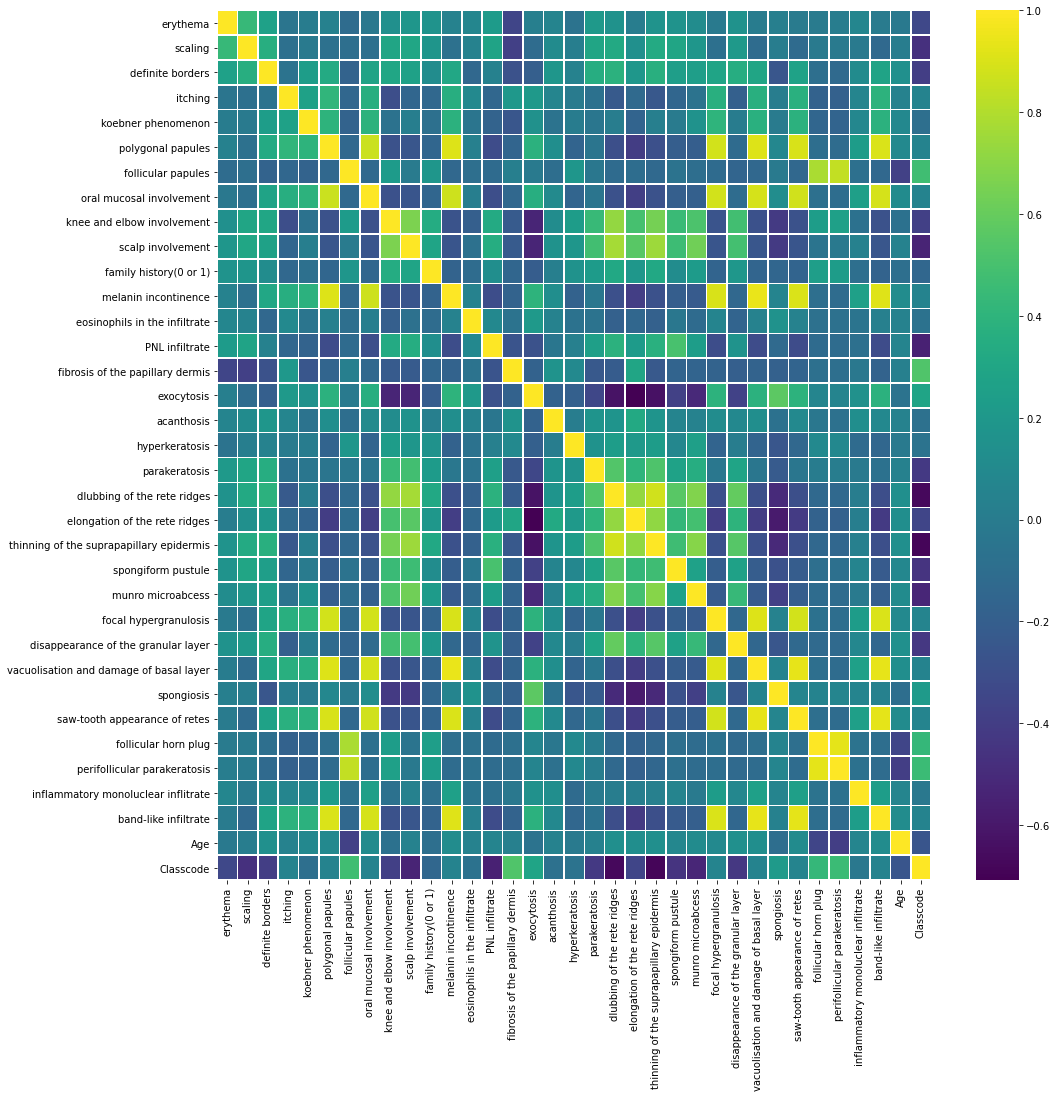

In [10]:
plt.figure(figsize=(16,16))
sns.heatmap(d.corr(), linewidths=.5, cmap='viridis')

# Multivariable Linear Regression

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm

('0.5', [0.8916939158655102, 0.8485889722030293])
('0.51', [0.8910379208471882, 0.8488443823075678])
('0.52', [0.8882715187034103, 0.8521819944464933])
('0.53', [0.8867707028616741, 0.8537053316235103])
('0.54', [0.8842272695621106, 0.8623630103555447])
('0.55', [0.885465106980808, 0.8607573476687155])
('0.56', [0.8841728658241036, 0.8651280900347614])
('0.57', [0.8846983270687329, 0.8676954520002818])
('0.58', [0.883295307848665, 0.8691922728768805])
('0.59', [0.8851067883452738, 0.864267321711301])
('0.6', [0.8874432564042383, 0.8587250054066142])
('0.61', [0.887766471097157, 0.8576275510509773])
('0.62', [0.8903358437722237, 0.851968617780632])
('0.63', [0.8900011606585502, 0.856547606328226])
('0.64', [0.8872080249595162, 0.8648800925747584])
('0.65', [0.8878313642872495, 0.8621449217548602])
('0.66', [0.8884650527115079, 0.8602535462687056])
('0.67', [0.883945554156843, 0.8764365509578549])
('0.68', [0.8853398271790504, 0.8726088482986467])
('0.69', [0.8878359670569879, 0.86567578

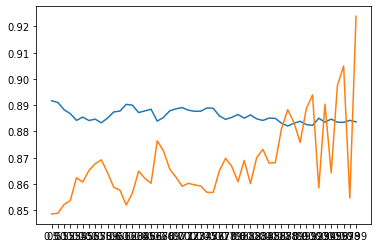

In [12]:
scaler = StandardScaler()
X = d.iloc[:,0:34]  # all rows, all the features and no labels
y = d.iloc[:,-1]
X_s = scaler.fit_transform(X)

dic={}
for i in range(50,100):
    X_train, X_test, y_train, y_test = train_test_split(X_s, y,train_size = i/100, random_state=1)
    

    model1=lm.LinearRegression()
    results=model1.fit(X_train,y_train) 
    predictions = model1.predict(X_train)
    accuracy=model1.score(X_train,y_train)
    accuracy2=model1.score(X_test,y_test)
    key=str(i/100)
    dic[key]=[accuracy,accuracy2]

for pair in dic.items():
    print(pair)

plt.plot(list(dic.keys()),list(dic.values()))
plt.show()

# we can see that at 75% of its training data the graph is stable without underfitting and overfitting issues. 88%<-->85%

# SVC with Normalization

('0.5', [1.0, 0.9562841530054644])
('0.51', [1.0, 0.9553072625698324])
('0.52', [0.9947089947089947, 0.9602272727272727])
('0.53', [0.9948186528497409, 0.9651162790697675])
('0.54', [0.9949238578680203, 0.9642857142857143])
('0.55', [0.995, 0.9636363636363636])
('0.56', [0.9950980392156863, 0.9627329192546584])
('0.57', [0.9951923076923077, 0.9617834394904459])
('0.58', [0.995260663507109, 0.961038961038961])
('0.59', [0.9953488372093023, 0.96])
('0.6', [0.9954337899543378, 0.952054794520548])
('0.61', [0.9954954954954955, 0.951048951048951])
('0.62', [0.995575221238938, 0.9496402877697842])
('0.63', [0.9956331877729258, 0.9485294117647058])
('0.64', [0.9914163090128756, 0.9696969696969697])
('0.65', [0.9915611814345991, 0.96875])
('0.66', [0.9916666666666667, 0.968])
('0.67', [0.9918032786885246, 0.9669421487603306])
('0.68', [0.9919354838709677, 0.9658119658119658])
('0.69', [0.9920318725099602, 0.9649122807017544])
('0.7', [0.9921568627450981, 0.9636363636363636])
('0.71', [0.992277

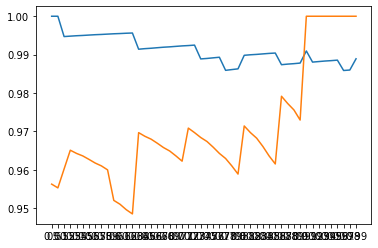

In [13]:
from sklearn.svm import SVC

scaler = StandardScaler()
X = d.iloc[:,0:34]  # all rows, all the features and no labels
y = d.iloc[:,-1]
X_s = scaler.fit_transform(X)

dic={}
for i in range(50,100):
    X_train, X_test, y_train, y_test = train_test_split(X_s, y,train_size = i/100, random_state=1)
    

    model2 = SVC(kernel='rbf', gamma= 'auto')
    results=model2.fit(X_train,y_train) 
    predictions = model2.predict(X_train)
    accuracy=model2.score(X_train,y_train)
    accuracy2=model2.score(X_test,y_test)
    key=str(i/100)
    dic[key]=[accuracy, accuracy2]

for pair in dic.items():
    print(pair)

plt.plot(list(dic.keys()),list(dic.values()))
plt.show()

# at 75% data, accuracies are 98.9% and 96.7%

('0.5', [0.9725274725274725, 0.8797814207650273])
('0.51', [0.9731182795698925, 0.8547486033519553])
('0.52', [0.9841269841269841, 0.9034090909090909])
('0.53', [0.9844559585492227, 0.9011627906976745])
('0.54', [0.9847715736040609, 0.8988095238095238])
('0.55', [0.985, 0.896969696969697])
('0.56', [0.9852941176470589, 0.906832298136646])
('0.57', [0.9855769230769231, 0.9044585987261147])
('0.58', [0.985781990521327, 0.9025974025974026])
('0.59', [0.986046511627907, 0.9])
('0.6', [0.9863013698630136, 0.910958904109589])
('0.61', [0.9864864864864865, 0.916083916083916])
('0.62', [0.9867256637168141, 0.9136690647482014])
('0.63', [0.9868995633187773, 0.9117647058823529])
('0.64', [0.9871244635193133, 0.9318181818181818])
('0.65', [0.9873417721518988, 0.9375])
('0.66', [0.9833333333333333, 0.952])
('0.67', [0.9836065573770492, 0.9504132231404959])
('0.68', [0.9838709677419355, 0.9487179487179487])
('0.69', [0.9840637450199203, 0.9473684210526315])
('0.7', [0.9882352941176471, 0.9454545454

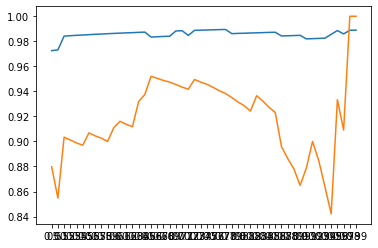

In [14]:
# SVC without Normalization
from sklearn.svm import SVC

scaler = StandardScaler()
X = d.iloc[:,0:34]  # all rows, all the features and no labels
y = d.iloc[:,-1]
X_s = scaler.fit_transform(X)

dic={}
for i in range(50,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = i/100, random_state=1)
    

    model = SVC(kernel='rbf', gamma= 'auto')
    results=model.fit(X_train,y_train) 
    predictions = model.predict(X_train)
    accuracy=model.score(X_train,y_train)
    accuracy2=model.score(X_test,y_test)
    key=str(i/100)
    dic[key]=[accuracy, accuracy2]

for pair in dic.items():
    print(pair)

plt.plot(list(dic.keys()),list(dic.values()))
plt.show()

# at 75% accuracies are 98.9% and 94.5%

for 2 neighbors


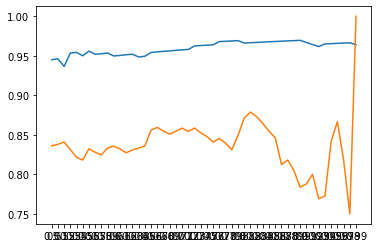

for 3 neighbors


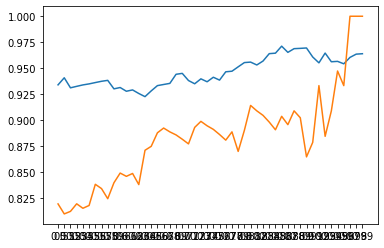

for 4 neighbors


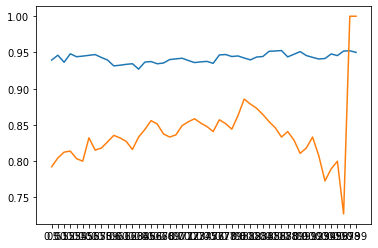

for 5 neighbors


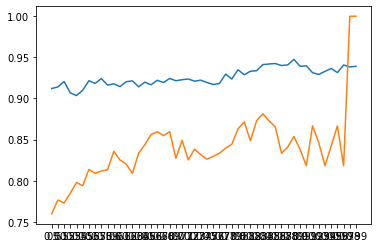

for 6 neighbors


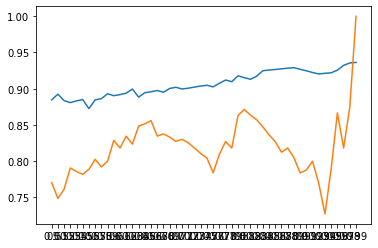

for 7 neighbors


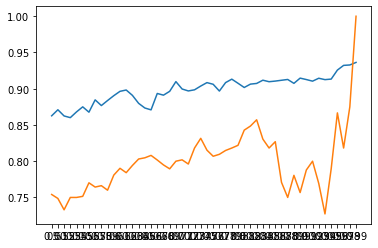

for 8 neighbors


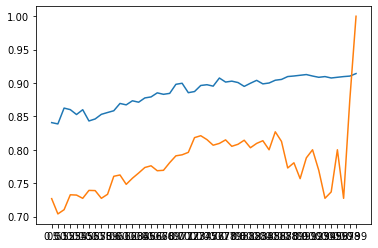

for 9 neighbors


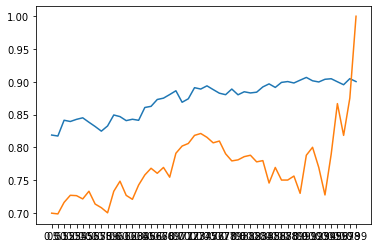

for 10 neighbors


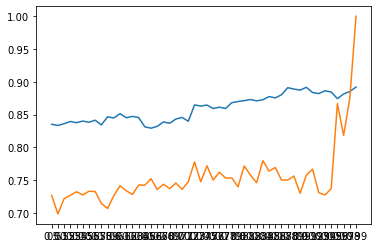

In [15]:
from sklearn.neighbors import KNeighborsClassifier as KNN
scaler = StandardScaler()
X = d.iloc[:,0:34]  # all rows, all the features and no labels
y = d.iloc[:,-1]
X_s = scaler.fit_transform(X)

dic={}
for j in range(2,11):
  for i in range(50,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = i/100, random_state=1) 
    model = KNN(n_neighbors=j)
    results=model.fit(X_train,y_train) 
    predictions = model.predict(X_train)
    accuracy=model.score(X_train,y_train)
    accuracy2=model.score(X_test,y_test)
    key=str(i/100)
    dic[key]=[accuracy, accuracy2]

  print('for '+str(j)+' neighbors')
  plt.plot(list(dic.keys()),list(dic.values()))
  plt.show()



('0.5', [0.9340659340659341, 0.819672131147541])
('0.51', [0.9408602150537635, 0.8100558659217877])
('0.52', [0.9312169312169312, 0.8125])
('0.53', [0.9326424870466321, 0.8197674418604651])
('0.54', [0.934010152284264, 0.8154761904761905])
('0.55', [0.935, 0.8181818181818182])
('0.56', [0.9362745098039216, 0.8385093167701864])
('0.57', [0.9375, 0.8343949044585988])
('0.58', [0.9383886255924171, 0.8246753246753247])
('0.59', [0.9302325581395349, 0.84])
('0.6', [0.9315068493150684, 0.8493150684931506])
('0.61', [0.9279279279279279, 0.8461538461538461])
('0.62', [0.9292035398230089, 0.8489208633093526])
('0.63', [0.925764192139738, 0.8382352941176471])
('0.64', [0.9227467811158798, 0.8712121212121212])
('0.65', [0.9282700421940928, 0.875])
('0.66', [0.9333333333333333, 0.888])
('0.67', [0.9344262295081968, 0.8925619834710744])
('0.68', [0.9354838709677419, 0.8888888888888888])
('0.69', [0.9442231075697212, 0.8859649122807017])
('0.7', [0.9450980392156862, 0.8818181818181818])
('0.71', [0.

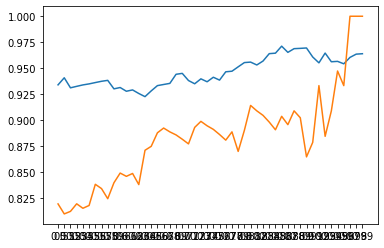

In [16]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score as f1


scaler = StandardScaler()
X = d.iloc[:,0:34]  # all rows, all the features and no labels
y = d.iloc[:,-1]
X_s = scaler.fit_transform(X)

dic={}
for i in range(50,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = i/100, random_state=1)
    

    model = KNN(n_neighbors=3) 
    results=model.fit(X_train,y_train) 
    predictions = model.predict(X_train)
    accuracy=model.score(X_train,y_train)
    accuracy2=model.score(X_test,y_test)
    key=str(i/100)
    dic[key]=[accuracy, accuracy2]

for pair in dic.items():
    print(pair)

plt.plot(list(dic.keys()),list(dic.values()))
plt.show()

# At 0.75 data accuracies are 94.14% and 89.13%

('0.5', [0.9945054945054945, 0.9672131147540983])
('0.51', [0.9946236559139785, 0.9720670391061452])
('0.52', [0.9947089947089947, 0.9715909090909091])
('0.53', [0.9948186528497409, 0.9651162790697675])
('0.54', [0.9949238578680203, 0.9642857142857143])
('0.55', [0.995, 0.9636363636363636])
('0.56', [0.9950980392156863, 0.9627329192546584])
('0.57', [0.9951923076923077, 0.9617834394904459])
('0.58', [0.990521327014218, 0.961038961038961])
('0.59', [0.9906976744186047, 0.96])
('0.6', [0.9908675799086758, 0.952054794520548])
('0.61', [0.990990990990991, 0.958041958041958])
('0.62', [0.9911504424778761, 0.9568345323741008])
('0.63', [0.9912663755458515, 0.9558823529411765])
('0.64', [0.9871244635193133, 0.9621212121212122])
('0.65', [0.9873417721518988, 0.9609375])
('0.66', [0.9875, 0.96])
('0.67', [0.9918032786885246, 0.9586776859504132])
('0.68', [0.9919354838709677, 0.9572649572649573])
('0.69', [0.9920318725099602, 0.956140350877193])
('0.7', [0.9921568627450981, 0.9545454545454546])


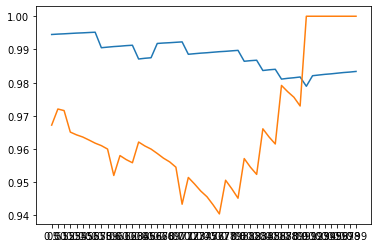

In [17]:
from sklearn.naive_bayes import MultinomialNB as mnb


scaler = StandardScaler()
X = d.iloc[:,0:34]  # all rows, all the features and no labels
y = d.iloc[:,-1]
X_s = scaler.fit_transform(X)

dic={}
for i in range(50,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = i/100, random_state=1)
    

    model = mnb() 
    results=model.fit(X_train,y_train) 
    predictions = model.predict(X_train)
    accuracy=model.score(X_train,y_train)
    accuracy2=model.score(X_test,y_test)
    key=str(i/100)
    dic[key]=[accuracy, accuracy2]

for pair in dic.items():
    print(pair)

plt.plot(list(dic.keys()),list(dic.values()))
plt.show()

# at 75% data, accuracies are 98.9% and 94.5%


# Random Forest


for 2 neighbors


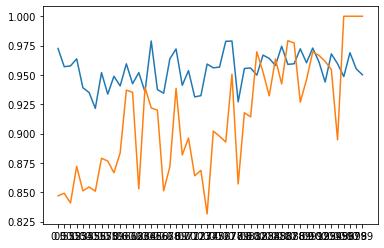

for 3 neighbors


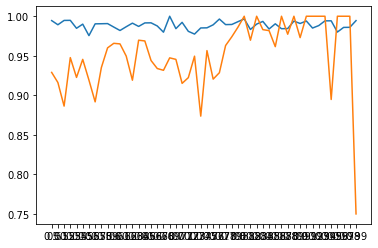

for 4 neighbors


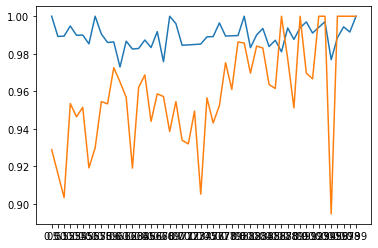

for 5 neighbors


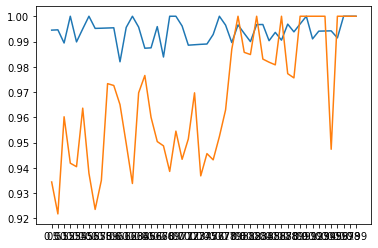

for 6 neighbors


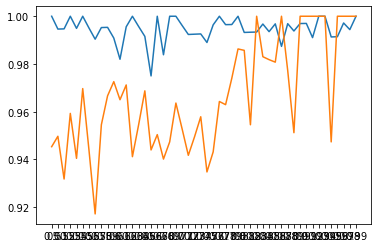

for 7 neighbors


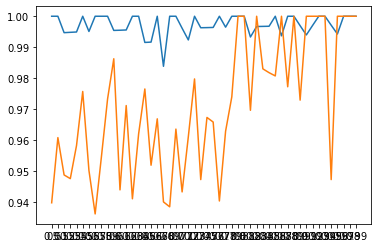

for 8 neighbors


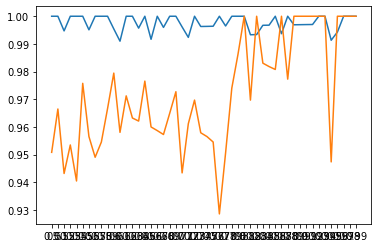

for 9 neighbors


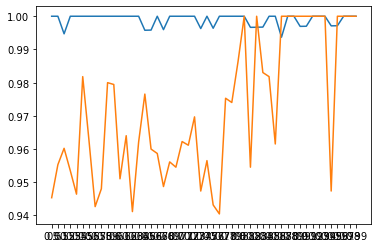

for 10 neighbors


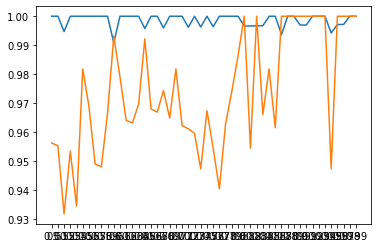

In [18]:
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
X = d.iloc[:,0:34]  # all rows, all the features and no labels
y = d.iloc[:,-1]
X_s = scaler.fit_transform(X)

dic={}
for j in range(2,11):
  for i in range(50,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = i/100, random_state=1) 
    model = RandomForestClassifier(random_state=0, n_estimators=j)
    results=model.fit(X_train,y_train) 
    predictions = model.predict(X_train)
    accuracy=model.score(X_train,y_train)
    accuracy2=model.score(X_test,y_test)
    key=str(i/100)
    dic[key]=[accuracy, accuracy2]

  print('for '+str(j)+' neighbors')
  plt.plot(list(dic.keys()),list(dic.values()))
  plt.show()

('0.5', [0.9835164835164835, 0.9453551912568307])
('0.51', [0.9731182795698925, 0.9217877094972067])
('0.52', [0.9682539682539683, 0.9147727272727273])
('0.53', [0.9844559585492227, 0.9418604651162791])
('0.54', [0.9949238578680203, 0.9226190476190477])
('0.55', [0.99, 0.9333333333333333])
('0.56', [0.9754901960784313, 0.937888198757764])
('0.57', [0.9855769230769231, 0.9299363057324841])
('0.58', [0.995260663507109, 0.9025974025974026])
('0.59', [0.986046511627907, 0.9333333333333333])
('0.6', [0.9771689497716894, 0.9178082191780822])
('0.61', [0.9774774774774775, 0.951048951048951])
('0.62', [0.9734513274336283, 0.9424460431654677])
('0.63', [0.9956331877729258, 0.9411764705882353])
('0.64', [0.9699570815450643, 0.9772727272727273])
('0.65', [0.9957805907172996, 0.9296875])
('0.66', [0.975, 0.944])
('0.67', [0.9877049180327869, 0.9669421487603306])
('0.68', [0.9838709677419355, 0.8974358974358975])
('0.69', [0.9920318725099602, 0.9649122807017544])
('0.7', [0.9921568627450981, 0.9636

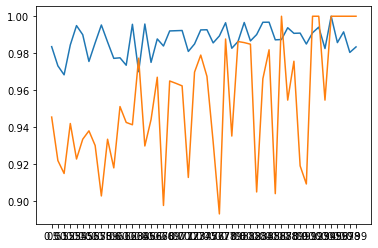

In [20]:
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
X = d.iloc[:,0:34]  # all rows, all the features and no labels
y = d.iloc[:,-1]
X_s = scaler.fit_transform(X)

dic={}
for i in range(50,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = i/100, random_state=1)
    

    model = RandomForestClassifier(n_estimators=3) 
    results=model.fit(X_train,y_train) 
    predictions = model.predict(X_train)
    accuracy=model.score(X_train,y_train)
    accuracy2=model.score(X_test,y_test)
    key=str(i/100)
    dic[key]=[accuracy, accuracy2]

for pair in dic.items():
    print(pair)

plt.plot(list(dic.keys()),list(dic.values()))
plt.show()